# Rephetio DWPCs: compare hetmech values with Cypher values

In [1]:
import pathlib

import pandas

In [2]:
commit = 'ef5f7a6b76b6a01499d65b95e3d7ca93ac5aba57'
url = f'https://github.com/dhimmel/learn/raw/{commit}/all-features/data/matrix/dwpc.tsv.bz2'
cypher_df = (
    pandas.read_table(url)
    .query("hetnet == 'rephetio-v2.0'")
    .drop('hetnet', axis='columns')
    .melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='cypher_dwpc')
)
cypher_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0


In [3]:
path = pathlib.Path('data/rephetio-DWPCs-hetmech.tsv.xz')
matrix_df = (
    pandas.read_table(path, compression='xz')
    .rename(columns={'compound': 'compound_id', 'disease': 'disease_id'})
    .melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='matrix_dwpc')
)
matrix_df.head(2)

,compound_id,disease_id,metapath,matrix_dwpc
0,DB00014,DOID:0050156,CbGaD,0.0
1,DB00014,DOID:0050425,CbGaD,0.0


In [9]:
compare_df = cypher_df.merge(matrix_df)
compare_df['difference'] = (compare_df.cypher_dwpc - compare_df.matrix_dwpc).abs()
compare_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0,0.0,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0,0.0,0.0


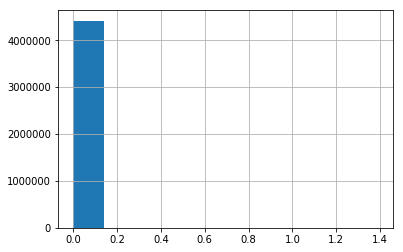

In [10]:
%matplotlib inline
compare_df.difference.hist();

In [12]:
max(compare_df['difference'])

1.3895009999999999

In [15]:
compare_df.sort_values('difference', ascending=False).head(20)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
2331248,DB00860,DOID:3083,CpDrDdGdD,0.012299,1.40180,1.389501
2357673,DB00860,DOID:3083,CpDrDuGuD,0.006209,1.31700,1.310791
3277173,DB00321,DOID:1826,CtDrDaGaD,0.000522,0.66654,0.666018
3294086,DB00945,DOID:3393,CtDrDdGdD,0.000000,0.60157,0.601570
3320511,DB00945,DOID:3393,CtDrDuGuD,0.000000,0.55728,0.557280
3278986,DB00945,DOID:3393,CtDrDaGaD,0.005130,0.55332,0.548190
2357887,DB00945,DOID:9008,CpDrDuGuD,0.011211,0.52191,0.510699
3318721,DB00331,DOID:11612,CtDrDuGuD,0.002222,0.51006,0.507838
3278169,DB00661,DOID:1826,CtDrDaGaD,0.008234,0.51299,0.504756
3277913,DB00571,DOID:1826,CtDrDaGaD,0.008234,0.51299,0.504756


In [17]:
# Metapaths
compare_df.query("difference > 0.01").metapath.value_counts()

CtDrDaGaD     553
CtDrDlAlD     473
CtDrDpSpD     430
CrCdGdCtD     283
CrCuGuCtD     283
CrCcSEcCtD    280
CtDrDuGuD     272
CrCbGbCtD     272
CtDrDdGdD     246
CrCiPCiCtD    235
CpDrDaGaD      49
CpDrDlAlD      48
CpDrDpSpD      40
CpDrDuGuD      31
CpDrDdGdD      29
CrCcSEcCpD     19
CrCiPCiCpD     18
CtDrDaGuD      16
CtDrDuGaD      16
CrCdGdCpD      15
CrCuGuCpD      13
CrCbGbCpD      12
CpDrDuGaD       2
CpDrDaGuD       2
Name: metapath, dtype: int64